In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
def temperature_func(resistance, a, b, c, d):
    typ = str(type(resistance))
    if "sympy" in typ:
        exp = spy.exp
    else:
        exp = np.exp
    return a * exp(-b * resistance) + c * exp(-d * resistance)

def temperature_eq(x, a, b, c, d):
    return r"%s e^{(-%s %s)} + %s e^{(-%s %s)}"%(a, b, x, c, d, x)

In [3]:
def getStrUncertainties(parameters, uncertainties):
    n = len(parameters)
    
    return [strUncertainty(*arg) for arg in zip(parameters, uncertainties)]

def getUncertainties(pcov):
    n = pcov.shape[0]
    return [pcov[i, i]**0.5 for i in range(n)]

def strUncertainty(value, uncertainty):
    v = abs(value)
    u = abs(uncertainty)
    if v > u:
        u, u_exp = ("%.0e" % u).split('e')
        u = int(u)
        u_exp = int(u_exp)
        value = round(value * 10 **(- u_exp), 0)
        
        st = r"(%d \pm %d)"%(value, u)
        exp = u_exp
    else:
        v, v_exp = ("%.0e" % v).split('e')
        v = int(v)
        v_exp = int(v_exp)
        u = round(u * 10 **(- v_exp), 0)
        st = r"(%d \m %d)"%(value, u)
        exp = v_exp
        
    if exp == 0:
        return st
    else:
        return r"%s\times10^{%d}"%(st, exp)
    
def makeStrFunction(x_var, y_var, popt, pcov, equation):
    unc = getUncertainties(pcov)
    un = getStrUncertainties(popt, unc)
    eq = equation(x_var, *un)
    return "$%s(%s) = %s$"%(y_var, x_var, eq)

In [4]:
low_temp = pd.read_csv("Low_temp.csv")
low_temp.keys()

Index(['Bath temp (C)', 'Decade set (ohm/10)', 'Circ temp (C)'], dtype='object')

In [5]:
x_key = "Decade set (ohm/10)"
y_key = "Bath temp (C)"
circ_key = "Circ temp (C)"

In [6]:
x = low_temp[x_key] * 10 / 1000
y = low_temp[y_key]
y_circ = low_temp[circ_key]

popt, pcov = curve_fit(temperature_func, x, y)

y_fit = temperature_func(x, *popt)

/home/juan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


20.27242751714297


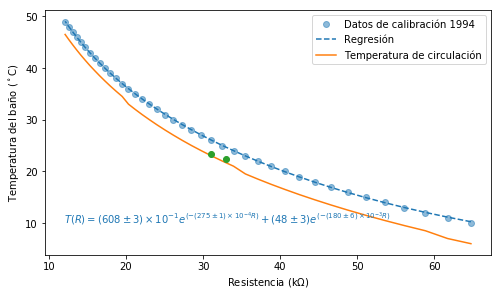

In [12]:
fig, ax = plt.subplots(figsize = (8, 4.5))

c = ax.plot(x, y, "o", alpha = 0.5, label = "Datos de calibración 1994")[0].get_color()
ax.plot(x, y_fit, "--", c = c, label = "Regresión")
ax.plot(x, y_circ, label = "Temperatura de circulación")

ax.set_xlabel(r"Resistencia (k$\Omega$)")
ax.set_ylabel(r"Temperatura del baño ($^\circ$C)")

ax.text(12, 10, makeStrFunction("R", "T", popt, pcov, temperature_eq), color = c)#, fontsize = 15)

ax.plot([33.0, 31.0], [22.42, 23.4], "o")

y_ = temperature_func(40, *popt)
print(y_)

ax.legend()
plt.show()

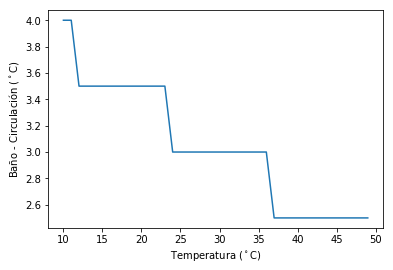

In [8]:
plt.plot(y, y - y_circ)
plt.xlabel("Temperatura ($^\circ$C)")
plt.ylabel("Baño - Circulación ($^\circ$C)")
plt.show()

In [8]:
1 / (popt[1] + popt[3]) * np.log((popt[0] * popt[2]) / 50)

19.64080543743691

In [9]:
pcov

array([[8.49563666e-02, 3.12250840e-05, 6.46253602e-01, 1.70857214e-03],
       [3.12250840e-05, 1.19267006e-08, 2.17437748e-04, 5.92810863e-07],
       [6.46253602e-01, 2.17437748e-04, 8.14967096e+00, 1.78763573e-02],
       [1.70857214e-03, 5.92810863e-07, 1.78763573e-02, 4.19264518e-05]])

In [10]:
import sympy as spy

In [11]:
T, R, a, b, c, d = spy.symbols("T R a b c d")

In [12]:
t = temperature_func(R, a, b, c, d)

In [13]:
eq = spy.Eq(T, t)